# Методы оптимизации
## Лабораторная работа № 1
### Методы минимизации функции одной переменной

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [289]:
# для тестирования методов
def test_func(func,args=None,n=2,eps=10**-5):
    f,bounds = select_function(n)
    x = np.linspace(bounds[0],bounds[1],1000)
    plt.plot(x,f(x))
    if args:
        x,y,n = func(f,bounds,eps=eps,**args)
    else:
        x,y,n = func(f,bounds,eps=eps)
    plt.scatter(x,y,color='red')
    print(x,y,n)


#### Метод перебора

-0.3854538545385454 0.7851952531879306 100000


c:\users\lainys\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


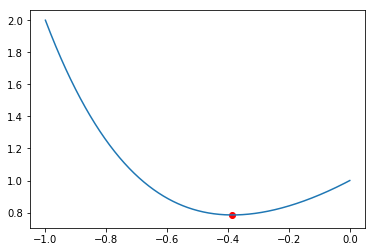

In [282]:
def bust(f,bounds,eps=0.0001):
    a,b = bounds
    n = np.ceil((b-a)/eps)
    x = np.linspace(a,b,n)
    y = f(x)
    m = np.argmin(y)
    return x[m],y[m],len(x)

test_func(bust)

#### Метод поразрядного поиска

-0.38545989990234375 0.7851952531581542 40


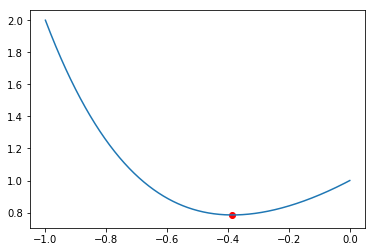

In [253]:
def iteration_striking_search(f,x,delta,f1,n=1):
    x += delta
    f2 = f(x)
    n += 1
    
    while f2 < f1:
        f1 = f2
        x += delta
        f2 = f(x)
        n += 1
        
    return x,f2,n
    

def striking_search(f,bounds,delta=0.25,eps=0.00001,eta=-4):
    a,b=bounds
    
    x = a
    f2 = f(x)
    n = 1
    
    while not np.abs(delta*eta) < eps:    
        x,f2,n = iteration_striking_search(f,x,delta,f2,n)
        
        delta /= eta
    
    return x-delta*eta,f2,n

test_func(striking_search)

#### Метод дихотомии

-0.3854572306442261 0.7851952531501787 34


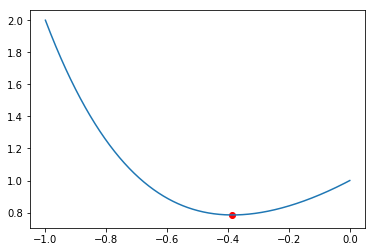

In [254]:
def iteration_dichotomy(f,a,b,delta,n=0):
    x1,x2 = (a + b - delta)/2,(a + b + delta)/2
    f1,f2 = f(x1),f(x2)
    
    if f1 <= f2:
        b = x2
    else:
        a = x1
    return a,b,n+2,(b-a)/2

def dichotomy(f,bounds,eps=0.00001,delta=0):
    if not (delta > 0 and delta < 2*eps):
        delta = eps
        
    a,b = bounds
    
    a,b,n,en = iteration_dichotomy(f,a,b,delta)
    
    while not en < eps:
        a,b,n,en = iteration_dichotomy(f,a,b,delta,n)
    
    x = (a+b)/2
    return x,f(x),n
        
    
test_func(dichotomy)

#### Метод золотого сечения

-0.3854604701650259 0.7851952531544908 25


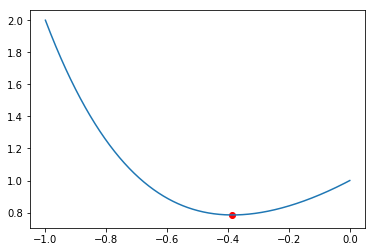

In [255]:
def iteration_golden_section(f,a,b,x1,x2,f1,f2,t,n=0):
   
    if f1 <= f2:
        #b,x2,f2,x1 = x2,x1,f1,(b - (1 - t)*(b-a))
        b,x2,f2 = x2,x1,f1
        x1 = b - t*(b-a)
        f1 = f(x1)
    else:
        #a,x1,f1,x2 = x1,x2,f2,(b - t*(b-a))
        a,x1,f1 = x1,x2,f2
        x2 = b - (1 - t)*(b-a)
        f2 = f(x2)
    
    n += 1
    
    return a,b,x1,x2,f1,f2,n
   
    
def golden_section(f,bounds,eps=0.001):
    a,b = bounds
    
    t = (np.sqrt(5) - 1)/2
    
    x1 = a + (1 - t)*(b - a)
    x2 = a + (t)*(b - a)
    
    f1 = f(x1)
    f2 = f(x2)
    n = 2
    
    #a,b,x1,x2,f1,f2,n = iteration_golden_section(f,a,b,x1,x2,f1,f2,t,n)
    
    en = (b-a)/2
    
    while not en < eps:
        a,b,x1,x2,f1,f2,n = iteration_golden_section(f,a,b,x1,x2,f1,f2,t,n)
        en *= t
    
    x = (a + b)/2
    
    return x,f(x),n
    

test_func(golden_section)

#### Метод парабол

-0.38545630345798365 0.7851952531562518 11


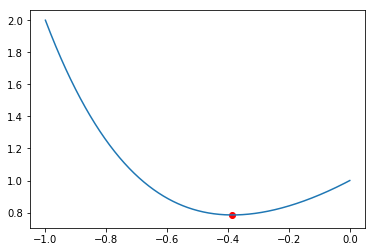

In [256]:
def iteration_parabola(f,x1,x2,x3,f1,f2,f3,n=0):
    
    a1 = (f2-f1)/(x2-x1)
    a2 = ((f3-f1)/(x3-x1)-(f2-f1)/(x2-x1))/(x3-x2)
    
    x = (x1 + x2 - a1/a2)/2
    fx = f(x)
    n += 1
    
    if x > x2 and fx > f2:
        x3,f3 = x,fx
    elif x > x2 and fx < f2:
        x1,f1 = x2,f2
        x2,f2 = x,fx
    elif x < x2 and fx > f2:
        x1,f1 = x,fx
    elif x < x2 and fx < f2:
        x3,f3 = x2,f2
        x2,f2 = x,fx
        
    return x,x1,x2,x3,f1,f2,f3,n
    
def parabola(f,bounds,eps=0.001,n=0):
    a,b = bounds
    
    x1,x2,x3 = a,(a+b)/2,b
    f1,f2,f3 = f(x1),f(x2),f(x3)
    n += 3
    
    x0,x1,x2,x3,f1,f2,f3,n = iteration_parabola(f,x1,x2,x3,f1,f2,f3,n)
    
    delta = 1
    
    while not delta < eps:
        x,x1,x2,x3,f1,f2,f3,n = iteration_parabola(f,x1,x2,x3,f1,f2,f3,n)
        
        delta = np.abs(x0 - x)
        
        x0 = x
        
    return x0,f(x0),n

test_func(parabola)
    

In [257]:
# центральная
def cf(f,x,h=0.001):
    return (f(x+h)-f(x-h))/(2*h)

# вторая
def cff(f,x,h=0.001):
    return (f(x+h)-2*f(x)+f(x-h))/(h**2)

# левая
def lf(f,x,h=0.001):
    return (f(x)-f(x-h))/h

# правая
def rf(f,x,h=0.001):
    return (f(x+h)-f(x))/h

#### Метод средней точки

-0.38545989990234375 0.7851952531508526 17


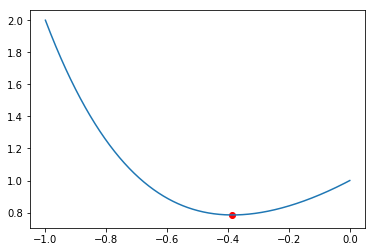

In [258]:
def iteration_midpoint(f,a,b,der=cf,n=0):
    x = (a + b)/2
    df = der(f,x)
    
    if df > 0:
        b = x
    else:
        a = x
        
    return x,df,a,b,n+1
    

def midpoint(f,bounds,eps=0.001,n=0):
    a,b = bounds
    
    df = 1
    x = (a+b)/2
    
    while not np.abs(df) < eps:
        x,df,a,b,n = iteration_midpoint(f,a,b,n=n)
        
    return x,f(x),n

test_func(midpoint)
    

#### Метод хорд

-0.38545637387682763 0.7851952531556764 24


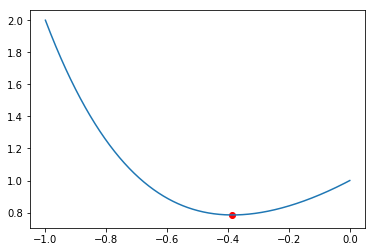

In [259]:
def iteration_chord(f,a,b,da,db,der=cf,n=0):
    x = a - da/(da - db)*(a-b)
    
    df = der(f,x)
    
    if df > 0:
        b = x
        db = df
    else:
        a = x
        da = df
        
    return x,df,a,b,da,db,n+1
    
def chord(f,bounds,eps=0.001,der=cf,n=0):
    a,b = bounds
    
    da = der(f,a)
    db = der(f,b)
    
    n = 2*2
    
    df = 1
    x = 0
    
    while not np.abs(df) < eps:
        x,df,a,b,da,db,n = iteration_chord(f,a,b,da,db,der=der,n=n)
    
    return x,f(x),n

test_func(chord)

#### Метод ньютона


-0.38545817079747124 0.7851952531473412 4


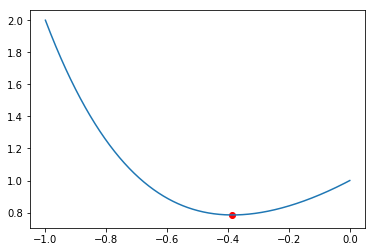

In [290]:
def iteration_newton(f,x,der=cf,der2=cff):
    df = der(f,x)
    dff = der2(f,x)
    
    return x - df/dff,df


def newton(f,bounds,x0=0,eps=0.001,n=0):
    
    df = cf(f,x0)
    dff = cff(f,x0)
    
    
    if np.abs(df) < eps:
        return x0,f(x0),n
    else:
        x = x0 - df/dff
        return newton(f,bounds,x,eps,n+1)

test_func(newton,args=dict(x0=0))

In [3]:
funcs = [(lambda x: x**3 - 3*np.sin(x),[0,1]),
            (lambda x: x**4 + x**2 + x + 1,[-1,0]),
            (lambda x: np.exp(x) + 1/x,[-1,0]),
            (lambda x: x**2 - 2*x + np.exp(-x),[-1,1.5]),
            (lambda x: x*np.sin(x) + 2*np.cos(x),[-6,-4]),
            (lambda x: x + 1/(x**2),[1,2]),
            (lambda x: 10*x*np.log(x) - (x**2)/2,[0.1,1]),
            (lambda x: np.exp(x) - (x**3)/3 + 2*x,[-2.5,-1]),
            (lambda x: x**2 - 2*x - 2*np.cos(x),[-0.5,1]),]

def select_function(n):
    return funcs[n-1]

In [11]:
def

(20.418870256521, [-1, 0])

In [20]:



def rafson(f,x0,e,n=0):
    pass
    
#f,bounds = select_function(2)
f = (lambda x: x*np.arctan(x)-(np.log(1+x**2))/2)
newton(f,bounds,0,0.01)

(0, 0)

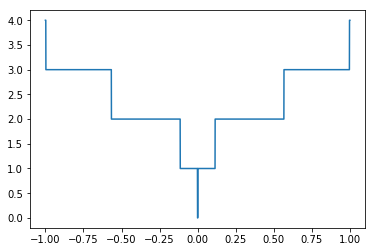

In [28]:
x = np.linspace(-1,1,20000)
y = f(x)

k = []
n = []
for i in range(len(x)):
    a,b = newton(f,[0,1],x[i],0.001)
    k.append(a)
    n.append(b)
    
plt.plot(x,n)


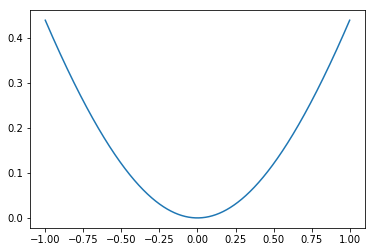

In [29]:
plt.plot(x,f(x))

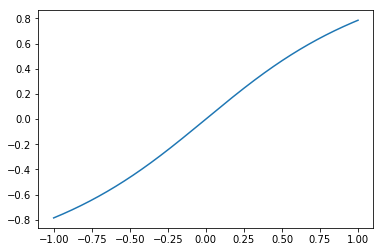

In [26]:
plt.plot(x,cf(f,0.001,x))

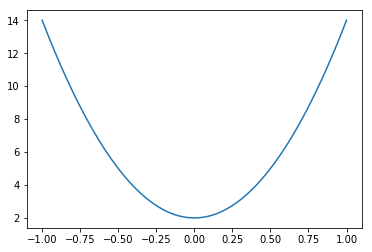

In [13]:
plt.plot(x,cff(f,0.001,x))

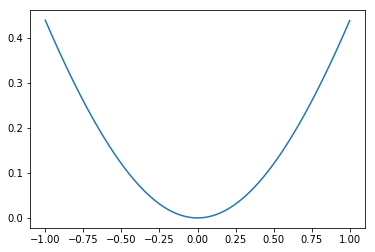

In [32]:
from scipy.misc import derivative

def newton_numeric(fun, x0, e, n):
    x = x0
    i = 0
    for _ in range(0, n):
        df = derivative(fun, x, n=1)
        ddf = derivative(fun, x, n=2)
        i += 1
        if np.abs(df) < e:
            i += 1
            return x, i
        else:
            x = x - df / ddf

            
fun5 = lambda x: x*np.arctan(x)-1/2*np.log(1+pow(x, 2))
d_fun5 = lambda x: np.arctan(x)
dd_fun5 = lambda x: 1/(pow(x, 2) + 1)

from scipy.misc import derivative


def newton_test_diff_type(fun, fun_prime, fun_second, a, b, e, n):
    newton_num = {}
    newton_analit = {}
    for x0 in np.arange(a, b, 0.01):
        newton_num[x0] = newton_numeric(fun, x0, e, n)[1]
        newton_analit[x0] = newton(fun_prime, fun_second, x0, e, n)[1]

    return [newton_num, newton_analit]

x = np.arange(-1, 1, 0.001)

y = fun5(x)
plt.plot(x, y)

c:\users\lainys\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


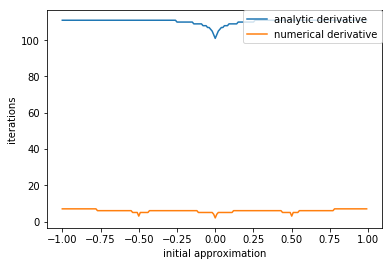

In [33]:
x, y = zip(*sorted((newton_test_diff_type(fun5, d_fun5, dd_fun5, -1, 1, 0.0001, 100)[1]).items()))
plt.plot(x, y, label="analytic derivative")
x, y = zip(*sorted((newton_test_diff_type(fun5, d_fun5, dd_fun5, -1, 1, 0.0001, 100)[0]).items()))
plt.plot(x, y,  label="numerical derivative")
plt.xlabel("initial approximation")
plt.ylabel("iterations")
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)
plt.show()